# Analiza zbioru danych - Glass


In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("../dbs/glass/glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# Liczba klas i ich rozkład
class_distribution = df['Type'].value_counts()
class_distribution

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [4]:
# Liczba instancji
instance_count = df.shape[0]
instance_count

214

In [5]:
# Liczba i nazwy atrybutów
attribute_count = df.shape[1] - 1  # Odejmujemy 1, ponieważ jedna kolumna to etykieta klasy
attribute_names = df.columns[:-1].tolist()  # Pomijamy kolumnę 'Alcohol'
attribute_count, attribute_names

(9, ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'])

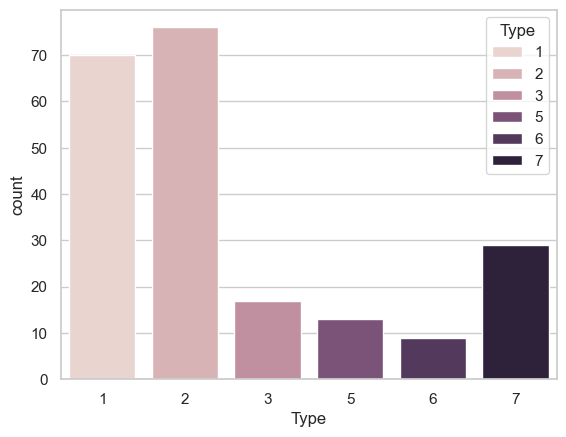

In [6]:
sns.set_theme( style="whitegrid", palette="muted",)
sns.countplot(x='Type', data=df, hue='Type')
plt.show()

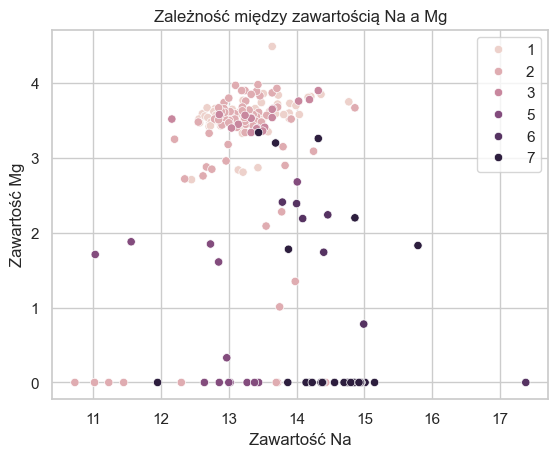

In [7]:
sns.scatterplot(x='Na', y='Mg', hue='Type', data=df, )
plt.title("Zależność między zawartością Na a Mg")
plt.xlabel("Zawartość Na")
plt.ylabel("Zawartość Mg")
plt.legend(title="Klasa wina")

plt.legend()
plt.show()

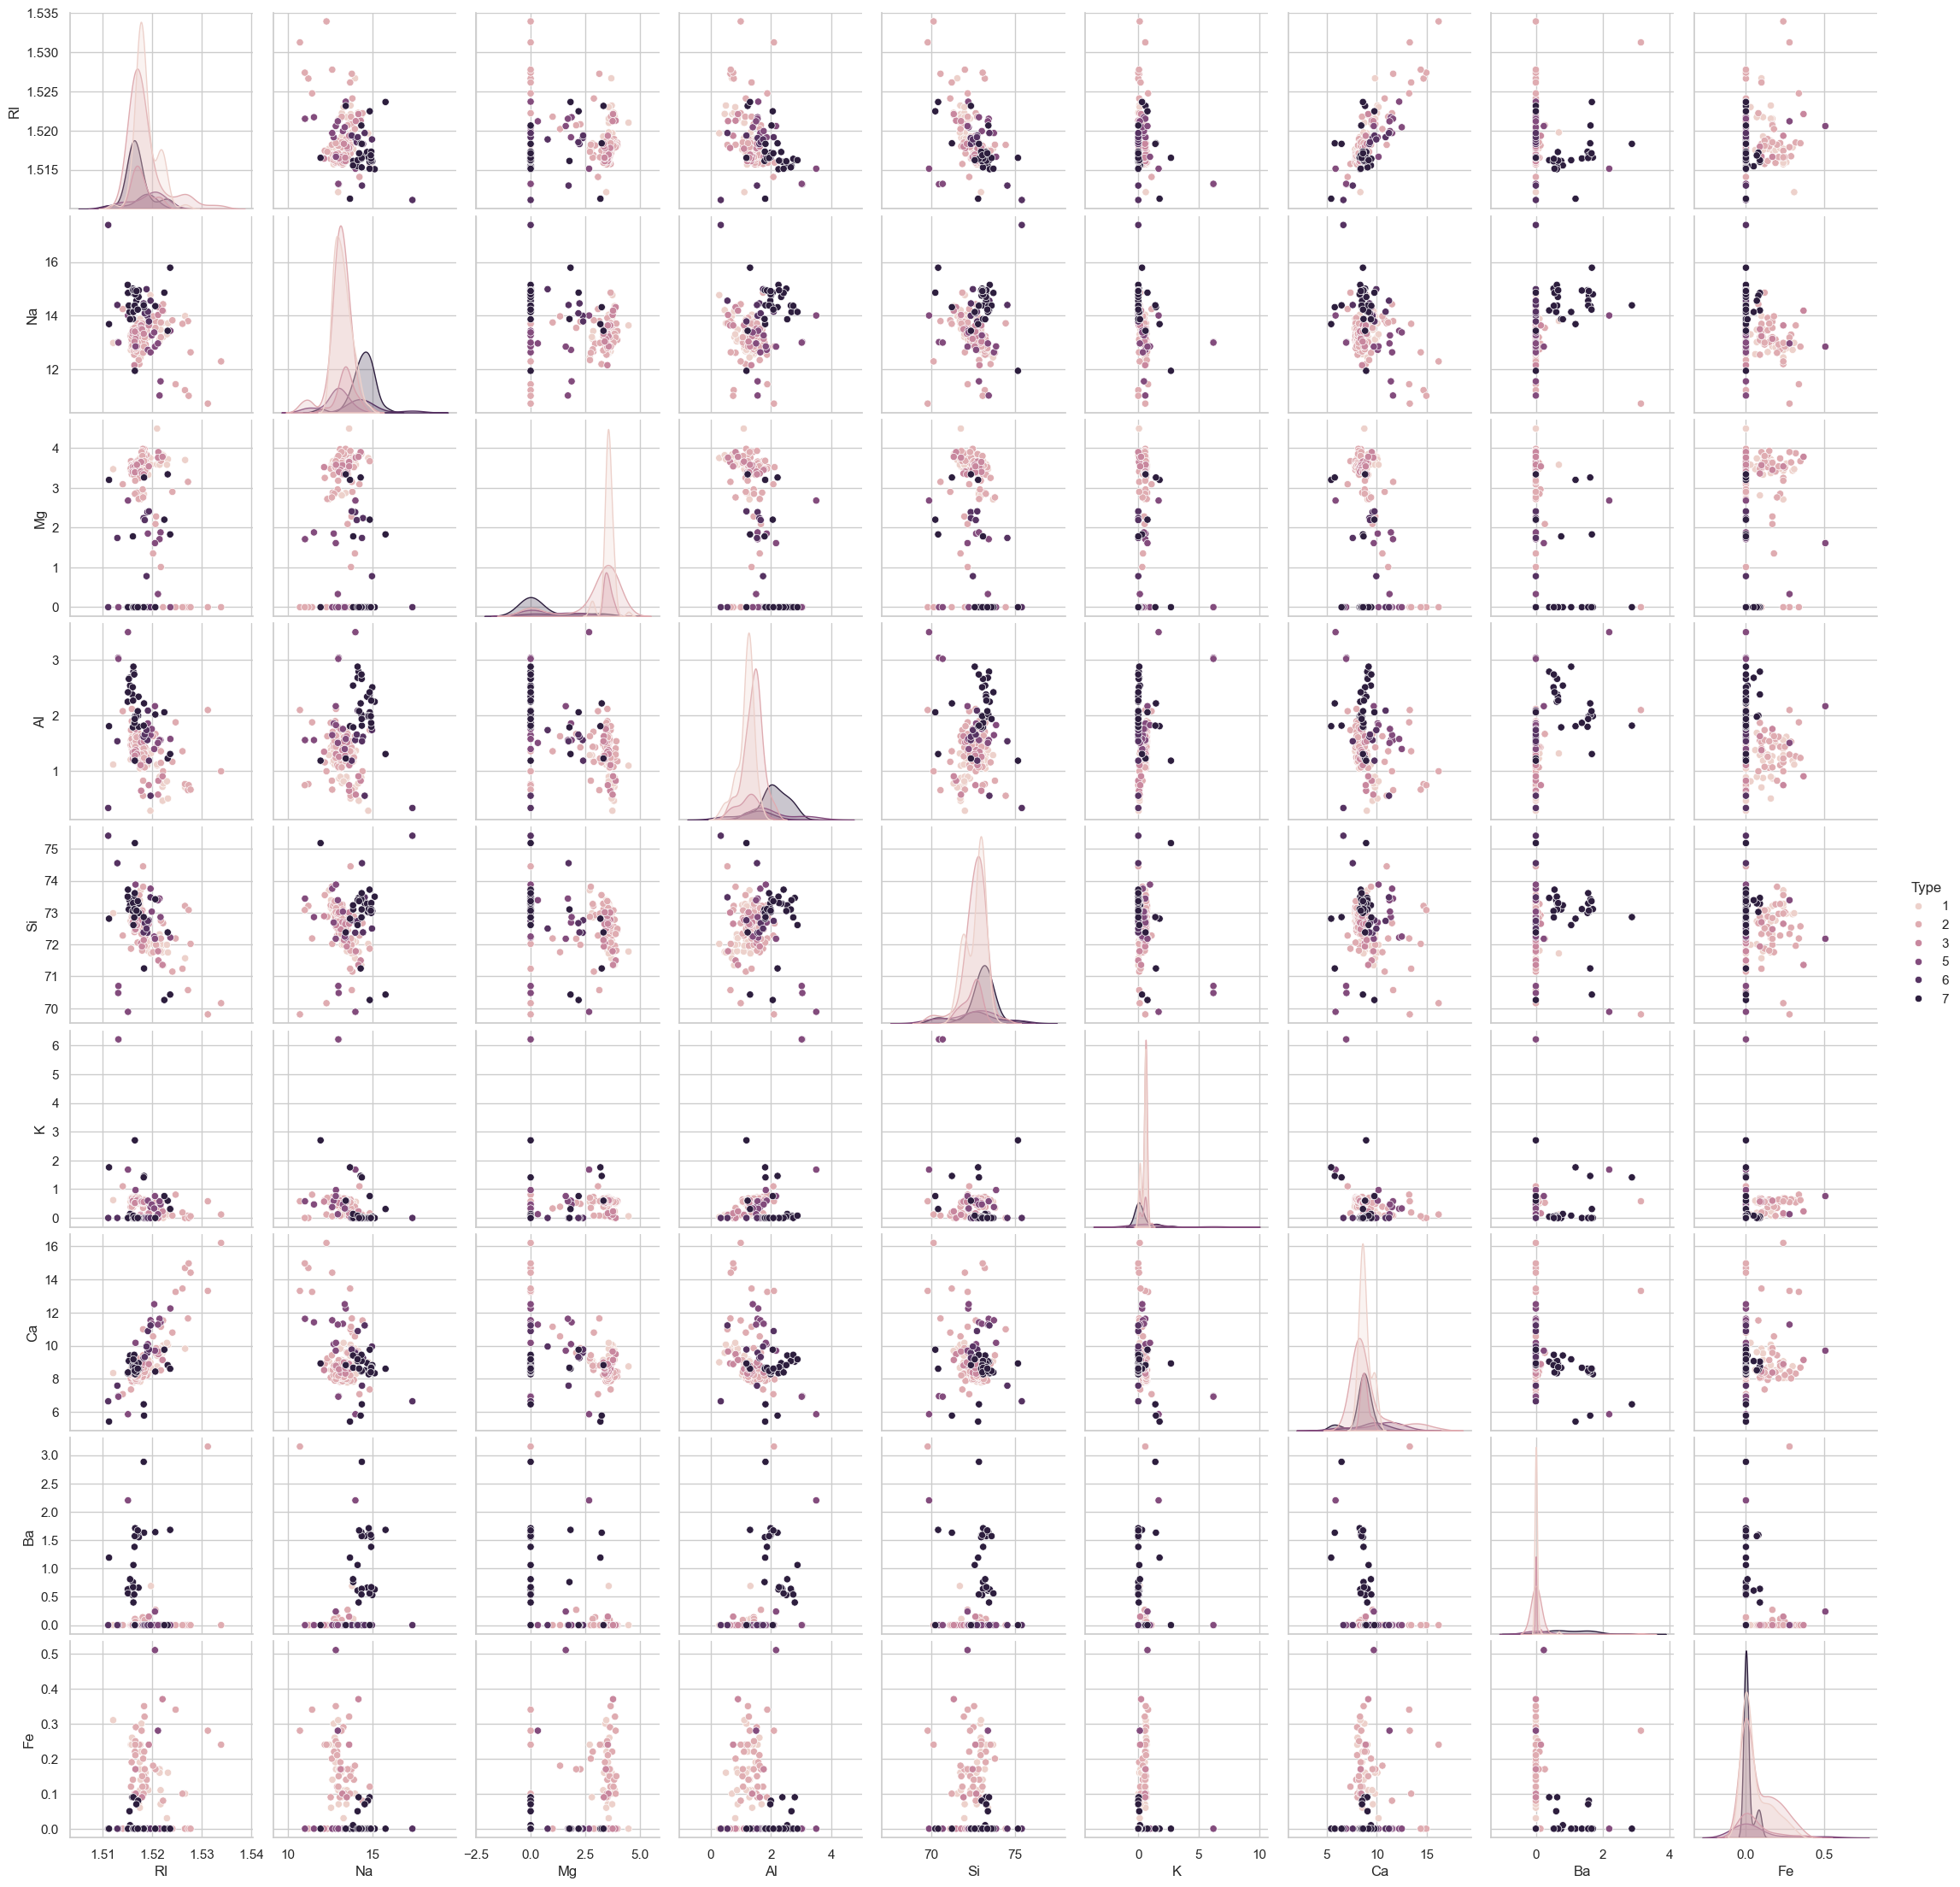

In [8]:
sns.pairplot(df, hue='Type')
plt.show()

In [9]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


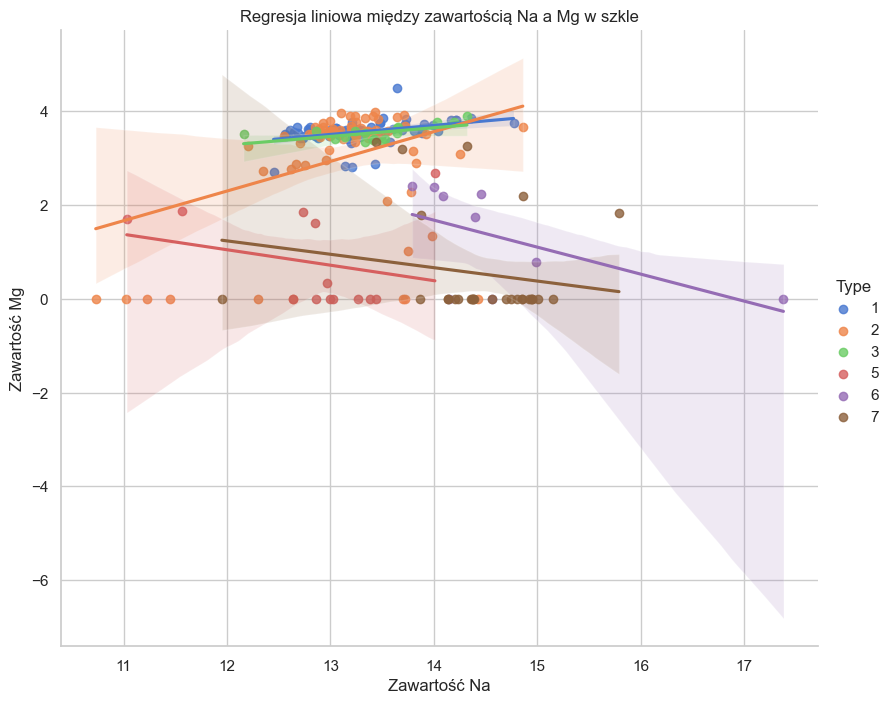

/var/folders/58/x_k_tb_50wj9t6kdymtnp5gc0000gn/T/ipykernel_23063/2652589094.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x="Fe", hue="Type", fill=True)


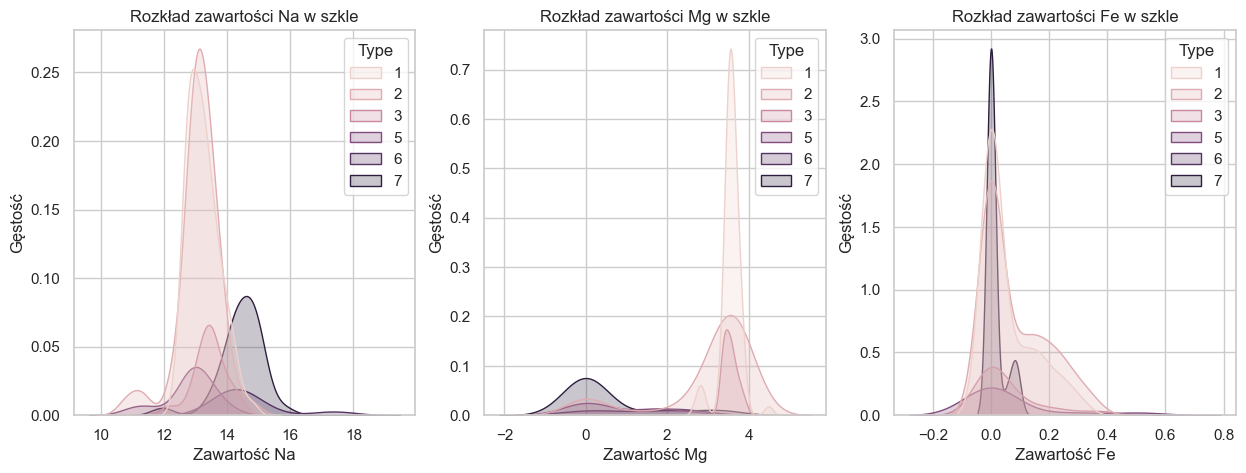

In [10]:
sns.lmplot(x="Na", y="Mg", hue="Type", data=df, height=7, aspect=1.2)
plt.title("Regresja liniowa między zawartością Na a Mg w szkle")
plt.xlabel("Zawartość Na")
plt.ylabel("Zawartość Mg")
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.kdeplot(data=df, x="Na", hue="Type", fill=True)
plt.title('Rozkład zawartości Na w szkle')
plt.xlabel("Zawartość Na")
plt.ylabel("Gęstość")

plt.subplot(1, 3, 2)
sns.kdeplot(data=df, x="Mg", hue="Type", fill=True)
plt.title('Rozkład zawartości Mg w szkle')
plt.xlabel("Zawartość Mg")
plt.ylabel("Gęstość")


plt.subplot(1, 3, 3)
sns.kdeplot(data=df, x="Fe", hue="Type", fill=True)
plt.title('Rozkład zawartości Fe w szkle')
plt.xlabel("Zawartość Fe")
plt.ylabel("Gęstość")
plt.show()

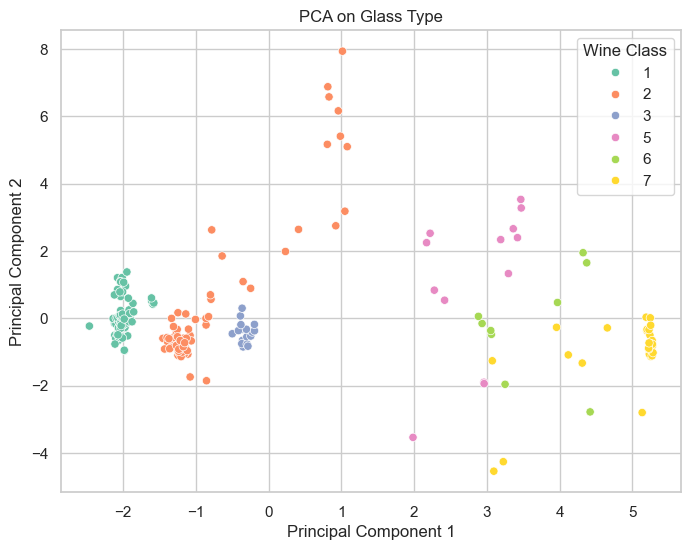

In [11]:
# PCA dla danych bez normalizacji
features = df.columns[1:]  # Pobieranie nazw cech, pomijając pierwszą kolumnę, która jest etykietą klasy
x = df.loc[:, features].values

# Zastosowanie PCA do redukcji wymiarów do 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Tworzenie DataFrame dla wyników PCA
pca_df = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df['Type'] = df['Type']

# Rysowanie wykresu wyników PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue="Type", data=pca_df, palette="Set2")
plt.title('PCA on Glass Type')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Wine Class")
plt.show()

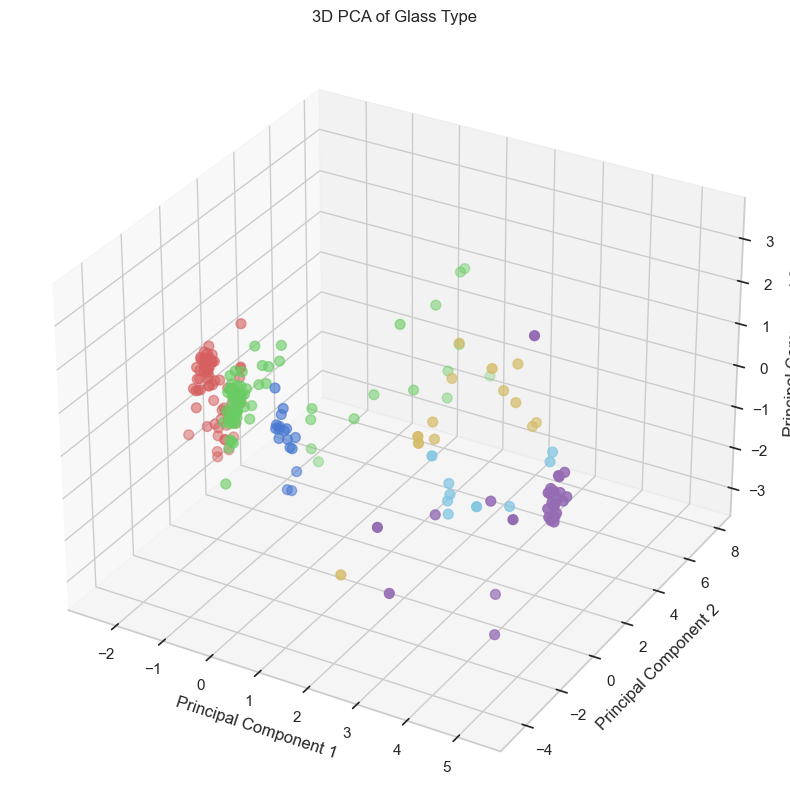

In [12]:


# PCA do redukcji do 3 głównych komponentów
pca_3d = PCA(n_components=3)
principalComponents_3d = pca_3d.fit_transform(x)
principalDf_3d = pd.DataFrame(
    data=principalComponents_3d,
    columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3']
)

# Dodanie etykiet klas do nowego DataFrame
finalDf_3d = pd.concat([principalDf_3d, df[['Type']]], axis=1)

# Wykres 3D PCA
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Paleta kolorów dla klas wina
colors = {1: 'r', 2: 'g', 3: 'b', 5: 'y', 6: 'c', 7: 'm'}
ax.scatter(finalDf_3d['Principal Component 1'], 
           finalDf_3d['Principal Component 2'], 
           finalDf_3d['Principal Component 3'],
           c=finalDf_3d['Type'].apply(lambda x: colors[x]), s=50)

# ax.view_init(elev=30, azim=15)

ax.set_title('3D PCA of Glass Type')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
